### Project 3 :  Data Science Shark Tank:  Pitch Your Ideas

**Due Date: May 2, 2022, BEFORE the midnight 11:59 EST**

NOTE: There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://techcrunch.com/wp-content/uploads/2018/10/shark-tank.jpg?w=730&crop=1" width="400px"> 

After the previous two projects,  you are now equipped with a powerful set of data science skills. In this project, you will work in teams to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a service/solution, develop a prototype/demo and prepare a pitch for your idea.
* Each team has 2-4 students (sign it up in Canvas).
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include:
  1. The use of real world dataset(s) from service APIs, and/or Kaggle
  1. A 90 second elevator pitch
  1. A longer presentation for your product
* NOTE, this project is much more open ended.  
  * Business is the focus.

# Background about Elevator Pitch (90 seconds) and Shark Tank

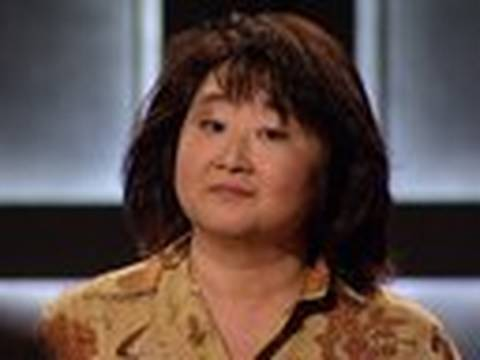

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings (APIs 
you can use for downloading data):** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


**Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

**Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

**NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.


#Problems

### Problem 1 (20 points): the Business Part 
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

Our business aims to solve the problem of malicious QR codes. We want to prevent our users from opening links that lead to websites they do not want to see.

2) Why the problem is important to solve? 

This problem is important to us, because we want to protect people from malicious links. We don't want people to fall victim to faulty links.

3) What is your idea to solve the problem? 

We hope to implement a QR code scanning application that automatically detects if a link has any inappropriate or unwanted content. We eventually want to have this software be embeded directly into smartphone cameras, so that users do not have to open a seperate application.

4) What differences you could make with your data science approach?

With our data science approach, we hope to add a protective layer to the internet. We want to censor people from things that they don't want to see and make sure our users have a more positive internet experience. 

5) Why do you believe the idea deserves the investment of the "sharks"?

This idea deserves the investment of the sharks, because it is a product that can help a large number of people be safer on the internet. It helps to protect vunerable demographics, such as children and the elderly from malicious web content. 


Our business aims to solve the problem of malicious QR codes. We want to prevent our users from opening 

try out methods:
* Random Forest 
* Xgboost
* Kmeans?
* MLP?
* graphics (confusion matrix)
* graphics for demo (phone camera scanning a qr code)
* explainer for qr code encoding (Aidan)
* QR Code neural network (Aidan maybe)

### Problem 2 (20 points): The Data Part 

Define how the dataset you used/collected can make a Data Science product.

#### Mount Drive and Import Statements DO FIRST


In [ ]:
#make sure to add shared folder as a shortcut in drive
#https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
from google.colab import drive 

drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/DS3010 Final Project/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os 
import pickle
import matplotlib.pyplot as plt
import qrcode
import re
import xgboost as xgb

from tld import get_tld, is_tld
from urllib.parse import urlparse

import tensorflow as tf
import itertools

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

In [ ]:
!pip install tld
!pip install qrcode

     |████████████████████████████████| 412 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 1.0 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=c89ce92e354d708dda2d2890985d5e80a9c9406a04df8e303cadc829909ed5ff
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


#### Building the dataset

In [140]:
#https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset

data = pd.read_csv(path+'malicious_phish.csv')

data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
#Class composition

data['type'].value_counts()/len(data)

benign        0.657415
defacement    0.148124
phishing      0.144521
malware       0.049939
Name: type, dtype: float64

In [ ]:
#Background: QR Codes are generated using a version (1 - 40) which denotes the maximum number of encodable alphanumeric characters.
#Each version results in a larger number of modules (black or white squares) from the smallest version 1 (21 x 21) to the largest version 40 (177 x 177)
#The dataset contains alphanumeric urls of various lengths, which will require different versions to encode, resulting in different sized data 
#The neural network needs a fixed shape as input so we will arbitrarily choose a cutoff length for our urls

#Mean length of the urls

data['url'].str.len().mean() #60.157

#Version 3 (29 x 29): Max 77 Alphanumeric characters

#Due to some issues with character encoding, we will allow a buffer to ensure all qrcodes are the same size.

60.1568310987099

In [ ]:
df = data[data['url'].str.len() < 40]

df['type'].value_counts()/len(df)

benign        0.686543
phishing      0.226718
malware       0.052702
defacement    0.034037
Name: type, dtype: float64

In [ ]:
#Function to encode url as qrcode then return 1d array of pixel values

def qrcode_as_array(link):
    qr = qrcode.QRCode(
    version=3,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=1,
    border=0)
    
    qr.add_data(link)
    img = qr.make_image(fill_color="black", back_color="white")
    np_frame = np.array(img.getdata())
    return np_frame

In [ ]:
#Apply the function from above to the url data and append to dataframe

#DATA IS IN DRIVE: 'malicious_phish_qrcode.pickle'

if not os.path.isfile(path + 'malicious_phish_qrcode.pickle'):
  df['qrcode'] = df['url'].apply(qrcode_as_array)

  filename = 'malicious_phish_qrcode.pickle'
  outfile = open(path+filename,'wb')

  pickle.dump(df,outfile)
  outfile.close()

#### Load Dataset for real this time

In [122]:
df = pd.read_csv(path+ 'malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [123]:
X = pd.DataFrame(df['url'], columns = ['url'])
y = [0 if t == 'benign' else 1 for t in df['type']]

In [124]:
X['url_len'] = X['url'].apply(lambda x: len(str(x)))

X.head()

,url,url_len
0,br-icloud.com.br,16
1,mp3raid.com/music/krizz_kaliko.html,35
2,bopsecrets.org/rexroth/cr/1.htm,31
3,http://www.garage-pirenne.be/index.php?option=...,88
4,http://adventure-nicaragua.net/index.php?optio...,235


In [125]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

X['domain'] = X['url'].apply(lambda i: process_tld(i))

X.head()

,url,url_len,domain
0,br-icloud.com.br,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,31,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,88,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,235,adventure-nicaragua.net


In [126]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    X[a] = X['url'].apply(lambda i: i.count(a))

X.head()

,url,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,88,www.garage-pirenne.be,0,1,1,4,3,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [127]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

X['abnormal_url'] = X['url'].apply(lambda i: abnormal_url(i))

In [128]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

X['https'] = X['url'].apply(lambda i: httpSecure(i))

X.head()

,url,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,88,www.garage-pirenne.be,0,1,1,4,3,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0


In [129]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

X['fd_length'] = X['url'].apply(lambda i: fd_length(i))

In [130]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

X['tld_length'] = X['domain'].apply(lambda i: tld_length(i))

X.pop('domain')

0                br-icloud.com.br
1                     mp3raid.com
2                  bopsecrets.org
3           www.garage-pirenne.be
4         adventure-nicaragua.net
                   ...           
651186            xbox360.ign.com
651187         games.teamxbox.com
651188           www.gamespot.com
651189           en.wikipedia.org
651190          www.angelfire.com
Name: domain, Length: 651191, dtype: object

In [131]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

X['count-digits']= X['url'].apply(lambda i: digit_count(i))

In [132]:
X.pop('url')

X.head()

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,fd_length,tld_length,count-digits
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,16,0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,5,11,1
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,7,14,1
3,88,0,1,1,4,3,0,0,0,0,0,0,0,1,1,0,9,21,7
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,9,23,22


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    stratify=y_train, 
                                                    test_size=0.20)

In [151]:
def make_data(X):
  X['url_len'] = X['url'].apply(lambda x: len(str(x)))

  X['domain'] = X['url'].apply(lambda i: process_tld(i))

  feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
  for a in feature:
      X[a] = X['url'].apply(lambda i: i.count(a))

  X['abnormal_url'] = X['url'].apply(lambda i: abnormal_url(i))

  X['https'] = X['url'].apply(lambda i: httpSecure(i))

  X['fd_length'] = X['url'].apply(lambda i: fd_length(i))

  X['tld_length'] = X['domain'].apply(lambda i: tld_length(i))

  X['count-digits']= X['url'].apply(lambda i: digit_count(i))

  X.pop('domain')

  X.pop('url')

  return X

#### Load qrcode data

In [ ]:
filename = 'malicious_phish_qrcode.pickle'

infile = open(path+filename,'rb')
data_qrcode = pickle.load(infile)
infile.close()

data_qrcode.head()

,url,type,qrcode
0,br-icloud.com.br,phishing,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 0..."
1,mp3raid.com/music/krizz_kaliko.html,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 2..."
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 2..."
12,myspace.com/video/vid/30602581,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255, 0, 25..."
19,http://www.vnic.co/khach-hang.html,defacement,"[0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 255, 0, 0, ..."


In [ ]:
data_qrcode = data_qrcode[data_qrcode.qrcode.str.len() == 841].reset_index(drop = True)

In [ ]:
#data['qrcode_tensor'] = data['qrcode'].apply(tf.convert_to_tensor)

In [ ]:
data.head()

,url,type,qrcode,qrcode_tensor
0,br-icloud.com.br,phishing,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 0...","(tf.Tensor(0, shape=(), dtype=int64), tf.Tenso..."
1,mp3raid.com/music/krizz_kaliko.html,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 2...","(tf.Tensor(0, shape=(), dtype=int64), tf.Tenso..."
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 2...","(tf.Tensor(0, shape=(), dtype=int64), tf.Tenso..."
3,myspace.com/video/vid/30602581,benign,"[0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255, 0, 25...","(tf.Tensor(0, shape=(), dtype=int64), tf.Tenso..."
4,http://www.vnic.co/khach-hang.html,defacement,"[0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 255, 0, 0, ...","(tf.Tensor(0, shape=(), dtype=int64), tf.Tenso..."


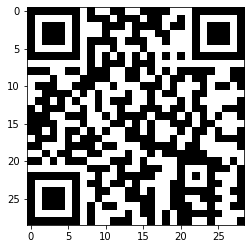

In [ ]:
fig = plt.figure
plt.imshow(data_qrcode.loc[4].qrcode.reshape(29,29), cmap='gray')
plt.show()

#### Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### XGBoost

In [134]:
model = xgb.XGBClassifier(n_estimators= 100, max_depth = 6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9333072274817835
Confusion matrix, without normalization


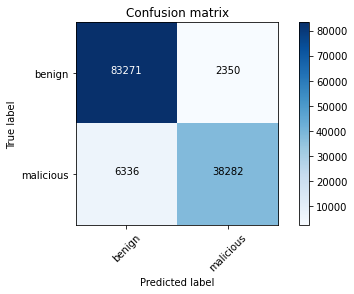

In [135]:
print(f'Accuracy: {sum(y_pred == y_test)/len(y_test)}')

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['benign', 'malicious'])

In [136]:
file_name = "xgb.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)


rf_score = rf.score(X_test, y_test)
print('Random Forest Accuracy: ', rf_score)



Random Forest Accuracy:  0.9145340489407935


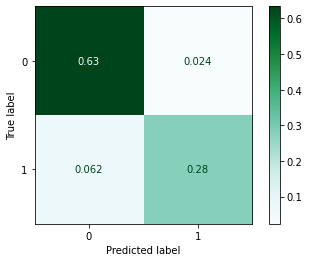

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_predictions = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf.classes_, normalize = 'all')
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot(cmap='BuGn')

#### MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 0, max_iter=2000, activation = "identity", hidden_layer_sizes=100)
mlp.fit(X_train, y_train)

mlp_score = mlp.score(X_test, y_test)
print('MLP Accuracy: ', mlp_score)

MLP Accuracy:  0.8537304494045562


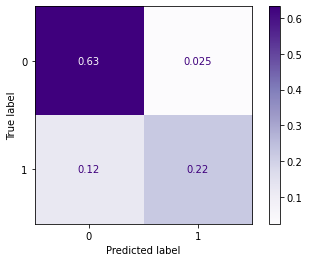

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mlp_predictions = mlp.predict(X_test)
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp.classes_, normalize = 'all')
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp.classes_)
disp.plot(cmap='Purples')

#### Neural Network

In [ ]:
mapper = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware' : 3}

X = data_qrcode['qrcode'].values
y = np.array(data_qrcode['type'].replace(mapper).values)

In [ ]:
y

array([2, 0, 0, ..., 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    stratify=y_train, 
                                                    test_size=0.20)

In [ ]:
X_train = np.array([a.reshape(29,29) for a in X_train])/255
X_test = np.array([a.reshape(29,29) for a in X_test])/255
X_valid = np.array([a.reshape(29,29) for a in X_valid])/255

y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
y_valid=tf.keras.utils.to_categorical(y_valid)

In [ ]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(3,3),input_shape=(29,29,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(input_shape=(29,29)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

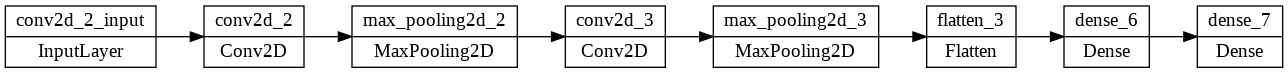

In [ ]:
tf.keras.utils.plot_model(model, rankdir = 'LR')

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.reshape((159466, 29, 29, 1))
X_test.reshape((49834, 29, 29, 1))
X_valid.reshape((39867, 29, 29, 1))

model.fit(X_train,y_train,epochs=20,batch_size=4000,verbose=True,validation_data=(X_test,y_test))

Epoch 1/20
40/40 [==============================] - 52s 1s/step - loss: 0.8895 - accuracy: 0.6866 - val_loss: 0.8611 - val_accuracy: 0.6866
Epoch 2/20
40/40 [==============================] - 41s 1s/step - loss: 0.8558 - accuracy: 0.6866 - val_loss: 0.8473 - val_accuracy: 0.6866
Epoch 3/20
40/40 [==============================] - 41s 1s/step - loss: 0.8357 - accuracy: 0.6866 - val_loss: 0.8213 - val_accuracy: 0.6866
Epoch 4/20
40/40 [==============================] - 42s 1s/step - loss: 0.8086 - accuracy: 0.6893 - val_loss: 0.7942 - val_accuracy: 0.6939
Epoch 5/20
40/40 [==============================] - 42s 1s/step - loss: 0.7861 - accuracy: 0.6950 - val_loss: 0.7743 - val_accuracy: 0.6973
Epoch 6/20
40/40 [==============================] - 42s 1s/step - loss: 0.7669 - accuracy: 0.6992 - val_loss: 0.7556 - val_accuracy: 0.7033
Epoch 7/20
40/40 [==============================] - 42s 1s/step - loss: 0.7476 - accuracy: 0.7053 - val_loss: 0.7366 - val_accuracy: 0.7080
Epoch 8/20
40/40 [==

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
y_valid[0:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [114]:
y_p = np.array([np.argmax(y) for y in y_pred])

In [115]:
y_v = np.array([np.argmax(y) for y in y_valid])

Accuracy: 0.7427195424787418
Confusion matrix, without normalization


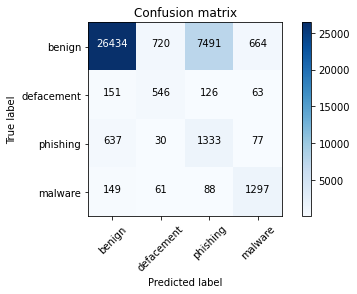

In [120]:
print(f'Accuracy: {sum(y_p == y_v)/len(y_v)}')

cm = confusion_matrix(y_p, y_v, labels=[0,1,2,3])
plot_confusion_matrix(cm,classes=['benign', 'defacement', 'phishing', 'malware'])

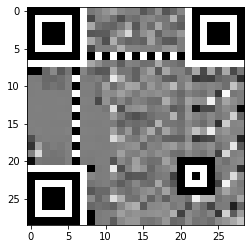

In [ ]:
import matplotlib.cm as cm


plt.imshow(X.mean().reshape(29,29), cmap = 'gray')

plt.show()

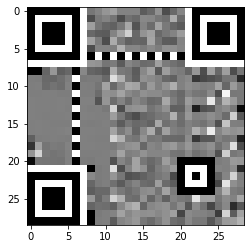

In [ ]:
plt.imshow(data[data['type'] == 1]['qrcode'].values.mean().reshape(29,29), cmap = 'gray')

#### Testing with new dataset

In [ ]:
load_data = pd.read_csv(path+'URL.txt', header=None,sep='\t', names = ['url','type'])

load_data.head()

,url,type
0,%253Cscript%253Ealert('XSS')%253C%252Fscript%253E,1
1,"<IMG SRC=x onload=""alert(String.fromCharCode(8...",1
2,"<IMG SRC=x onafterprint=""alert(String.fromChar...",1
3,"<IMG SRC=x onbeforeprint=""alert(String.fromCha...",1
4,"<IMG SRC=x onbeforeunload=""alert(String.fromCh...",1


In [ ]:
X = pd.DataFrame(load_data['url'], columns = ['url'])
y = [0 if t == 0 else 1 for t in load_data['type']]

In [ ]:
X['url_len'] = X['url'].apply(lambda x: len(str(x)))

X['domain'] = X['url'].apply(lambda i: process_tld(i))

feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    X[a] = X['url'].apply(lambda i: i.count(a))

X['abnormal_url'] = X['url'].apply(lambda i: abnormal_url(i))

X['https'] = X['url'].apply(lambda i: httpSecure(i))

X['fd_length'] = X['url'].apply(lambda i: fd_length(i))

X['tld_length'] = X['domain'].apply(lambda i: tld_length(i))

X['count-digits']= X['url'].apply(lambda i: digit_count(i))

X.pop('domain')

X.pop('url')

X.head()

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,fd_length,tld_length,count-digits
0,49,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,-1,15
1,57,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,0,-1,6
2,63,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,0,-1,6
3,64,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,0,-1,6
4,65,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,0,-1,6


In [ ]:
y_pred = model.predict(X)

print(f"Accuracy: {sum(y_pred == y)/len(y_pred)}")

Accuracy: 0.39762968052215736


In [ ]:
y_pred = model.predict(X_valid)

print(f"Accuracy: {sum(y_pred == y_valid)/len(y_pred)}")

Accuracy: 0.9102417675231066


### Problem 3 (20 points): The Demo Part  


Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

Accuracy: 0.9322782198078529
Confusion matrix, without normalization


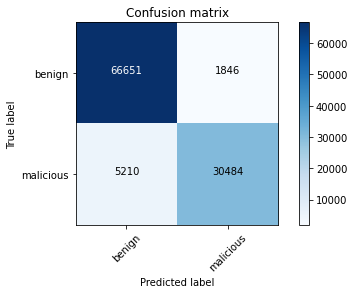

In [166]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
y_pred = xgb_model_loaded.predict(X_valid)

print(f'Accuracy: {sum(y_pred == y_valid)/len(y_valid)}')

cm = confusion_matrix(y_valid, y_pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['benign', 'malicious'])

<pre>





 ██████ ██    ██  █████         ██████  ██████  
██       ██  ██  ██   ██       ██    ██ ██   ██ 
██        ████   ███████ █████ ██    ██ ██████  
██         ██    ██   ██       ██ ▄▄ ██ ██   ██ 
 ██████    ██    ██   ██        ██████  ██   ██ 
                                   ▀▀       




</pre>                                               

In [169]:
link = 'https://www.windocyte.com/nam/589c76f5-ca15-41f9-884b-55ec15a0672a/bea5ba70-befd-479c-b422-741c38b278db/a1c7f35c-0984-4556-9490-f38d16698a6b/landing?id=RjZhTFBGdWRLNUhFVFdwUDloSW1JVS81YTVBL1lMS2xrMklQditEbVo2b0dtRWJBT0hpbzVkS1dnSVRqZGxJckRMeUhjalV0Z2Q5eHdxTXpWOG5uV0RnNHI5aGVUcUllMnZ1eE0wemYxUVNlVkM1MjAyek5sWVhoNGVUQkFCbm45N21scjJEc2NWak4zVy9TY0NQd3BCbncrSExCOUpNM2pab21RUWNXeGkvWDVLUHp5T3RHVHNRUkwyRnhUNUVjSjhDRkozT3UyeDhyMC9MM25LY2ZHN1UvQ0FVWHFkMnFiMzF1U29hR1JUSHBGcUkzaS83aVRnbjU4ZUtlRlBmN1QxZWd6eThETkxUNThaeEdhVTBuYllyeEVZVDFldWZ5dE1VM0lDLy9weGdzdk1UV2hVcVl4bXU1SEFHcU1UenB0UWFzbzdkdGhpdFl6V1ZFT25pUzZ3PT0'

df_demo = pd.DataFrame(data = [[link, 1]], columns = ['url','type'])

y = df_demo.pop('type')
X = make_data(df_demo)

if xgb_model_loaded.predict(X)[0]:
  print('Link is potentially malicious')
else:
  print('Link is safe')

Link is potentially malicious


### Problem 4 (20 points): Prepare a 90 second Pitch and *present* it in the class 

* Prepare the slide(s) for the Pitch (10 points)
* It can be part of your final presentation (10 points).

**Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!)**



# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Solution ideas and evaluation results.

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this project you need to prepare a final presentation PPT file 
including the pitch.**

* Report: please prepare a report (less than 10 pages) to report what you found in the data and how data supports you product idea.

  * What data you collected?

  * How does this data support your product idea?

  * How did you analyse the data?

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


**How to submit:**

        Please submit through canvas.wpi.edu.

### DS3010 Project 3 Team 1
        
**Note: Each team just needs to submits one submission**

# Grading Criteria:

**Totoal Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 20
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 20
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 20
    -----------------------------------
  
    -----------------------------------
    Question 4:  90 second product pitch
    Points: 20
    -----------------------------------
      
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for 10 minutes of presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
